<a href="https://colab.research.google.com/github/aarakova/VvAD/blob/main/%D0%98%D0%A1%D0%98%D0%A2_%D0%9A%D0%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Клиенты с высокими заказами (топ-10%):
                      ФИО клиента  Итоговая стоимость
4            Иванов Иван Иванович                6221
12     Сидоров Дмитрий Дмитриевич                6023
20       Петров Максим Николаевич                6381
26  Михайлов Александр Дмитриевич                6013
41    Михайлов Владимир Андреевич                6463
43  Новиков Николай Александрович                6589
61       Зайцев Андрей Алексеевич                6166
84     Васильев Николай Сергеевич                6153
88     Зайцев Сергей Владимирович                6037
89     Кузнецов Сергей Николаевич                6034


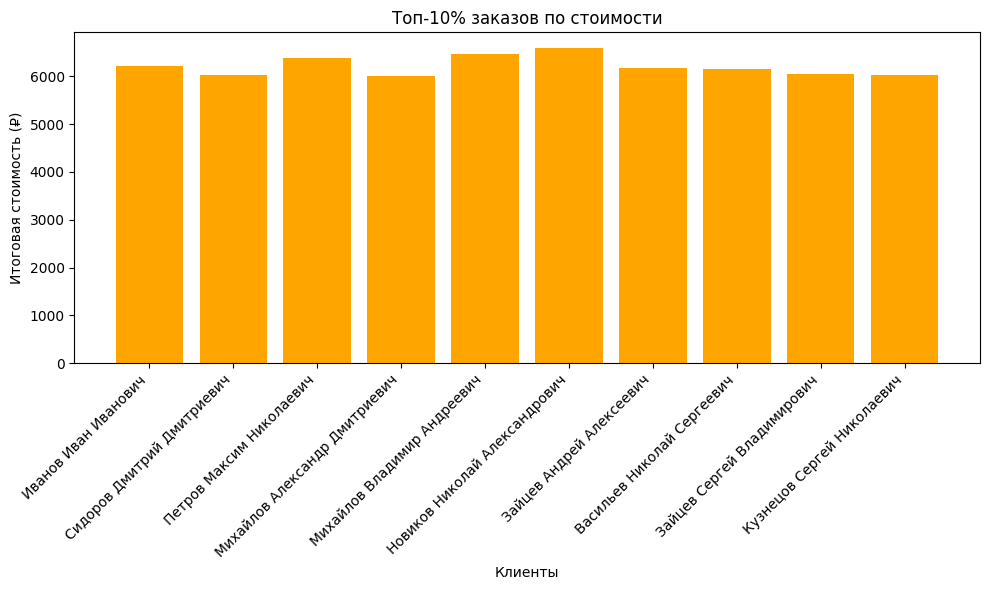

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
data_file = "журнал учета.xlsx"  # Название файла
sheet_name = "Журнал учета"  # Название листа
df = pd.read_excel(data_file, sheet_name=sheet_name)

# Конвертация столбцов дат в формат datetime
df["Дата обращения клиента"] = pd.to_datetime(df["Дата обращения клиента"])
df["Дата получения заказа"] = pd.to_datetime(df["Дата получения заказа"])

# 1. Клиенты с высокой стоимостью заказов (верхние 10%)
top_10_percent_threshold = df["Итоговая стоимость"].quantile(0.9)
top_clients = df[df["Итоговая стоимость"] >= top_10_percent_threshold]
print("Клиенты с высокими заказами (топ-10%):")
print(top_clients[["ФИО клиента", "Итоговая стоимость"]])

# Построение графика распределения заказов
plt.figure(figsize=(10, 6))
plt.bar(top_clients["ФИО клиента"], top_clients["Итоговая стоимость"], color="orange")
plt.title("Топ-10% заказов по стоимости")
plt.xlabel("Клиенты")
plt.ylabel("Итоговая стоимость (₽)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Выручка по материалам:
Материал изделия
ДСП       131388
Дерево    187985
Металл    119334
Name: Итоговая стоимость, dtype: int64


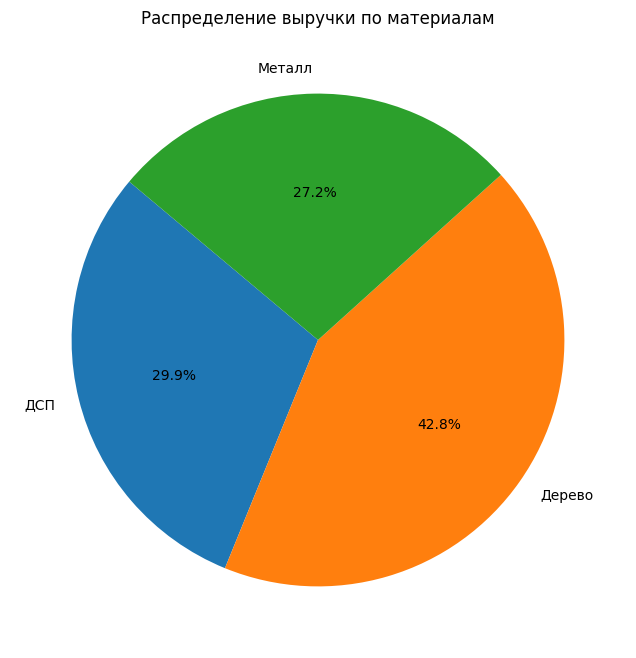

In [9]:
# 2. Материалы с наибольшей выручкой
revenue_by_material = df.groupby("Материал изделия")["Итоговая стоимость"].sum()
print("\nВыручка по материалам:")
print(revenue_by_material)

# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
revenue_by_material.plot.pie(autopct="%1.1f%%", startangle=140)
plt.title("Распределение выручки по материалам")
plt.ylabel("")  # Убираем надпись оси
plt.show()


Количество заказов по месяцам:
Месяц
1    44
2    56
dtype: int64


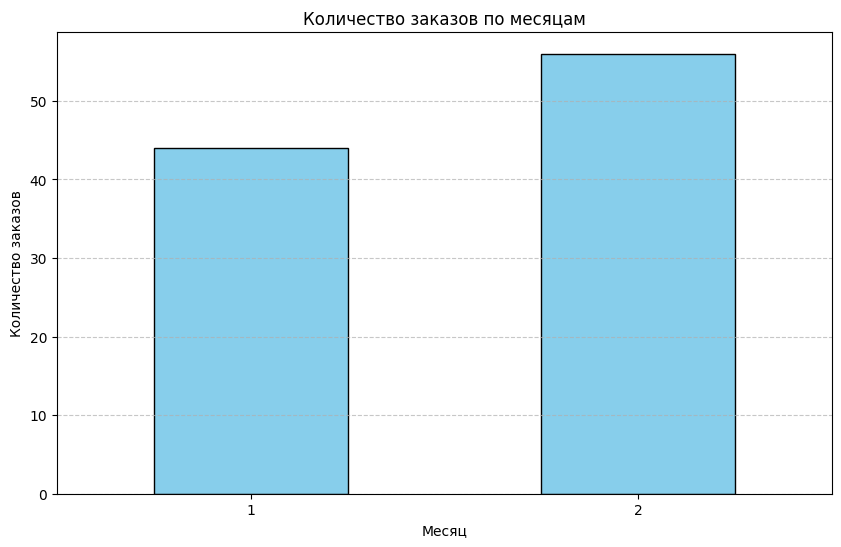

In [12]:
# Добавление столбца с месяцем из даты получения заказа
df["Месяц"] = pd.to_datetime(df["Дата получения заказа"]).dt.month

# Подсчет количества заказов по месяцам
orders_by_month = df.groupby("Месяц").size()
print("\nКоличество заказов по месяцам:")
print(orders_by_month)

# Построение столбчатой диаграммы по месяцам
plt.figure(figsize=(10, 6))
orders_by_month.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Количество заказов по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Количество заказов")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
